---

# <center>★ Email Spam Detection ★


---

---

### Description:

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

The dataset, taken from the UCI ML repository, contains about 4600 emails labelled as **spam** or **ham**. 

### Acknowledgements:
This dataset has been referred from Kaggle.

### Objective:
- Understand the Dataset & cleanup (if required).
- Build classification models to predict whether or not the email is spam.
- Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

---

# <center> Stractegic Plan of Action:

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling
7. Project Outcomes & Conclusion

---

# <center>1. Data Exploration

---

In [2]:
# Importing the basic librarires
import numpy as np
import pandas as pd
import seaborn as sns
from classes.base import SMOTE, NaiveBayes, KNeighbors, VIF

from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

In [3]:
# Importing the dataset

raw_data = pd.read_csv(
    r'.\data\Spam.csv',
    header=0,
    index_col=False)

target = 'spam'
labels = ['Ham','Spam']
features = [i for i in raw_data.columns.values if i not in [target]]

original_df = raw_data.copy(deep=True)
display(raw_data.head())

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,...,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,...,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
# Checking the dtypes of all the columns
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [5]:
# Checking number of unique rows in each feature
# Checking if there is a categorical feature
uniques = raw_data[features].nunique().sort_values()
numerical_feature = []
categorical_feature = []

for i in range(raw_data[features].shape[1]):
    if uniques.values[i] <= 7:
        categorical_feature.append(uniques.index[i])
    else:
        numerical_feature.append(uniques.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(numerical_feature),len(categorical_feature)))


Inference: The Datset has 57 numerical & 0 categorical features.


In [6]:
#Checking the stats of all the columns

display(raw_data.describe())

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,...,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,...,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,...,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

# <center> 2. Exploratory Data Analysis (EDA)

---

            Target Variable Distribution           


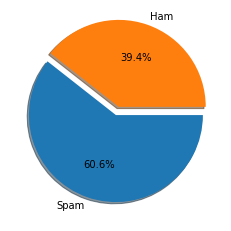

In [7]:
# Let us first analyze the distribution of the target variable
map_target_class = {}
for class_target, value in enumerate(raw_data[target].unique()):
    map_target_class[value] = labels[class_target]

exploratory_data = raw_data.copy()
exploratory_data[target] = exploratory_data[target].map(map_target_class)
explode = np.zeros(len(labels))
explode[-1] = 0.1
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(
    exploratory_data[target].value_counts(),
    labels=exploratory_data[target].value_counts().index,
    counterclock=False,
    shadow=True, 
    explode=explode,
    autopct='%1.1f%%',
    radius=1,
    startangle=0)
plt.show()

# <center> 3. Data Preprocessing

---

In [8]:
# Removal of any Duplicate rows (if any)
counter = 0
r,c = original_df.shape

exploratory_data = raw_data.copy()
exploratory_data.drop_duplicates(inplace=True)
exploratory_data.reset_index(drop=True, inplace=True)

if exploratory_data.shape == (r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-exploratory_data.shape[0]}')


Inference: Number of duplicates dropped ---> 391


In [9]:
# Fixing the imbalance using SMOTE Technique

data_smote = exploratory_data.copy()

print('Original class distribution:')
print(data_smote[target].value_counts())

smote = SMOTE()
smote.fit(data_smote, target)

data_resample = smote.resample(35)
data_smote = pd.concat([data_smote, data_resample], ignore_index=True)

data_smote[target] = data_smote[target].astype(np.int64)
print('\nClass distribution after applying SMOTE Technique:')
print(data_smote[target].value_counts())

Original class distribution:
0    2531
1    1679
Name: spam, dtype: int64

Class distribution after applying SMOTE Technique:
0    2531
1    2266
Name: spam, dtype: int64


**Inference:** \
Correlation plt between the variables convey lot of information about the realationship betweem them. There seems to be strong multicollinearity in the dataset.

Let us check with different techniques if we can improve the model's performance by performing Feature Selection/Extraction steps to take care of these multi-collinearity...

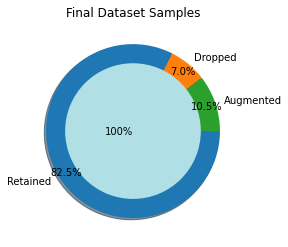


Inference:The final dataset after cleanup has 58 samples & 4601 rows.


In [10]:
# Final Dataset size after performing Preprocessing
ratios = [raw_data.shape[0], original_df.shape[0] - exploratory_data.shape[0], data_smote.shape[0] - exploratory_data.shape[0]]
labels = ['Retained','Dropped','Augmented']
plt.title('Final Dataset Samples')
plt.pie(
    ratios,
    radius = 1,
    shadow=True,
    labels=labels,
    counterclock=False,
    autopct='%1.1f%%',
    pctdistance=0.9,
    explode=[0,0,0])
plt.pie(
    [raw_data.shape[0]],
    labels=['100%'],
    labeldistance=-0,
    radius=0.78,
    shadow=True,
    colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} rows.'.format(raw_data.shape[1], raw_data.shape[0]))

# <center> 4. Data Manipulation

In [11]:
#Splitting the data intro training & testing sets
model_data = data_smote.copy()
model_data.columns=[i.replace('[','_') for i in model_data.columns]

model_features = model_data.drop([target],axis=1)
model_classes = model_data[target]
train_X, test_X, train_Y, test_Y = train_test_split(model_features, model_classes, train_size=0.8, test_size=0.2, random_state=0)
 
print(
    'Original set  ---> ',
    model_features.shape, model_classes.shape,
    '\nTraining set  ---> ',
    train_X.shape, train_Y.shape,
    '\nTesting set   ---> ',
    test_X.shape,'', test_Y.shape)

Original set  --->  (4797, 57) (4797,) 
Training set  --->  (3837, 57) (3837,) 
Testing set   --->  (960, 57)  (960,)


In [12]:
# Feature Scaling (Standardization)
std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
train_X_std = std.fit_transform(train_X)
train_X_std = pd.DataFrame(train_X_std, columns =model_features.columns)
display(train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
test_X_std = std.transform(test_X)
test_X_std = pd.DataFrame(test_X_std, columns=model_features.columns)
display(test_X_std.describe())

                               Standardardization on Training set                               


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,...,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq__,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,...,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03
mean,-1.574046e-17,1.296273e-17,5.555455e-17,-6.481365e-18,-3.703637e-18,4.166591e-17,-4.074001e-17,-4.074001e-17,-1.481455e-17,4.907319e-17,5.555455e-18,-1.333309e-16,5.555455e-18,9.259092e-19,-2.592546e-17,5.277683e-17,5.370273e-17,2.314773e-18,-9.722047e-18,-1.296273e-17,-7.407274e-17,6.666546e-17,-1.111091e-17,2.037000e-17,-3.703637e-18,...,-3.518455e-17,3.703637e-18,1.018500e-17,-5.555455e-17,-5.833228e-17,-7.407274e-18,9.259092e-18,3.981410e-17,9.259092e-19,4.351773e-17,-3.611046e-17,-1.018500e-17,7.222092e-17,-2.222182e-17,1.851818e-18,-1.666637e-17,-7.407274e-18,-2.407364e-17,-4.722137e-17,-5.277683e-17,5.833228e-17,-9.259092e-19,-1.851818e-18,7.407274e-18,3.333273e-17
std,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,...,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00
min,-3.754936e-01,-2.632096e-01,-5.923545e-01,-5.086915e-02,-4.944700e-01,-3.687208e-01,-3.093985e-01,-2.642070e-01,-3.449756e-01,-3.885470e-01,-3.278767e-01,-6.556180e-01,-3.220698e-01,-1.919219e-01,-1.968973e-01,-3.390889e-01,-3.513992e-01,-3.633230e-01,-1.016222e+00,-2.101733e-01,-7.366930e-01,-1.314663e-01,-3.163132e-01,-2.469768e-01,-3.314575e-01,...,-1.735357e-01,-1.454334e-01,-1.921455e-01,-2.491489e-01,-3.372897e-01,-5.992207e-02,-1.956639e-01,-1.926364e-01,-1.243499e-01,-1.712361e-01,-2.039902e-01,-1.238812e-01,-3.046445e-01,-1.916138e-01,-7.540158e-02,-1.161245e-01,-1.604944e-01,-6.169419e-01,-1.595443e-01,-3.519311e-01,-3.428741e-01,-9.597108e-02,-1.370954e-01,-3.909114e-01,-5.439189e-01
25%,-3.754936e-01,-2.632096e-01,-5.923545e-01,-5.086915e-02,-4.944700e-01,-3.687208e-01,-3.093985e-01,-2.642070e-01,-3.449756e-01,-3.885470e-01,-3.278767e-01,-6.556180e-01,-3.220698e-01,-1.919219e-01,-1.968973e-01,-3.390889e-01,-3.513992e-01,-3.633230e-01,-9.989228e-01,-2.101733e-01,-7.366930e-01,-1.314663e-01,-3.163132e-01,-2.469768e-01,-3.314575e-01,...,-1.735357e-01,-1.454334e-01,-1.921455e-01,-2.491489e-01,-3.372897e-01,-5.992207e-02,-1.956639e-01,-1.926364e-01,-1.243


                                Standardardization on Testing set                                


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,...,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq__,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,...,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,-0.010484,0.012898,0.074789,-0.045227,-0.037876,-0.003556,-0.013606,0.014866,0.009277,0.031463,-0.008917,-0.014062,0.030893,-0.019635,-0.002635,-0.029028,0.000065,0.000907,0.014717,0.038813,-0.030400,0.011844,-0.023906,-0.009657,-0.037685,...,-0.021115,-0.033395,-0.045831,-0.029568,-0.041426,-0.022020,0.037115,-0.047645,-0.009378,-0.038765,0.006852,-0.025706,0.042325,-0.005988,0.004872,0.010721,0.005998,0.027184,-0.020286,-0.015422,-0.017040,-0.005072,0.012800,0.075210,0.045503
std,1.046739,0.956745,1.096736,0.063550,0.855413,0.900398,0.882813,0.897253,0.992423,0.962810,0.911735,0.917156,0.909825,0.960646,0.893336,0.865760,1.041632,0.971630,1.012462,1.601342,0.931479,1.094686,0.971449,1.201995,0.985744,...,0.841750,0.820058,0.695226,0.821870,1.034279,0.361628,1.528262,0.762635,0.982699,0.820525,1.095340,0.674139,1.197614,0.896845,1.366486,1.267296,1.047111,1.680518,0.739408,0.714536,0.779384,0.520412,0.957322,2.501233,1.481277
min,-0.375494,-0.263210,-0.592354,-0.050869,-0.494470,-0.368721,-0.309398,-0.264207,-0.344976,-0.388547,-0.327877,-0.655618,-0.322070,-0.191922,-0.196897,-0.339089,-0.351399,-0.363323,-1.016222,-0.210173,-0.736693,-0.131466,-0.316313,-0.246977,-0.331457,...,-0.173536,-0.145433,-0.192146,-0.249149,-0.337290,-0.059922,-0.195664,-0.192636,-0.124350,-0.171236,-0.203990,-0.123881,-0.304645,-0.191614,-0.075402,-0.116125,-0.160494,-0.616942,-0.159544,-0.351931,-0.342874,-0.095971,-0.137095,-0.390911,-0.542112
25%,-0.375494,-0.263210,-0.592354,-0.050869,-0.494470,-0.368721,-0.309398,-0.264207,-0.344976,-0.388547,-0.327877,-0.655618,-0.322070,-0.191922,-0.196897,-0.339089,-0.351399,-0.363323,-0.948466,-0.210173,-0.736693,-0.131466,-0.316313,-0.246977,-0.331457,...,-0.173536,-0.145433,-0.192146,-0.249149,-0.337290,-0.059922,-0.195664,-0.192636,-0.124350,-0.171236,-0.203990,-0.123881,-0.304645,-0.191614,-0.075402,-0.116125,-0.160494,-0.616942,-0.159544,-0.351931,-0.342874,-0.095971,-0.117906,-0.347536,-0.473439
50%,-0.375494,-0.263210,-0.592354,-0.050869,-0.494470,-0.368721,-0.309398,-0.264207,-0.344976,-0.388547,-0.327877,-0.315390,-0.322070,-0.191922,-0.196897,-0.339089,-0.351399,-0.363323,-0.157022,-0.210173,-0.406611,-0.131466,-0.316313,-0.246977,-0.331457,...,-0.173536,-0.145433,-0.192146,-0.249149,-0.337290,-0.059922,-0.195664,-0.192636,-0.124350,-0.171236,-0.203990,-0.123881,-0.304645,-0.191614,-0.075402,-0.116125,-0.160494,-0.298601,-0.159544,-0.273346,-0.342874,-0.095971,-0.096615,-0.276718,-0.348744
75%,-0.283404,-0.263210,0.418973,-0.050869,0.133580,-0.363393,-0.309398,-0.264207,-0.344976,0.065360,-0.327877,0.283182,-0.322070,-0.191922,-0.196897,-0.13019

# <center> 5. Feature Selection/Extraction

---

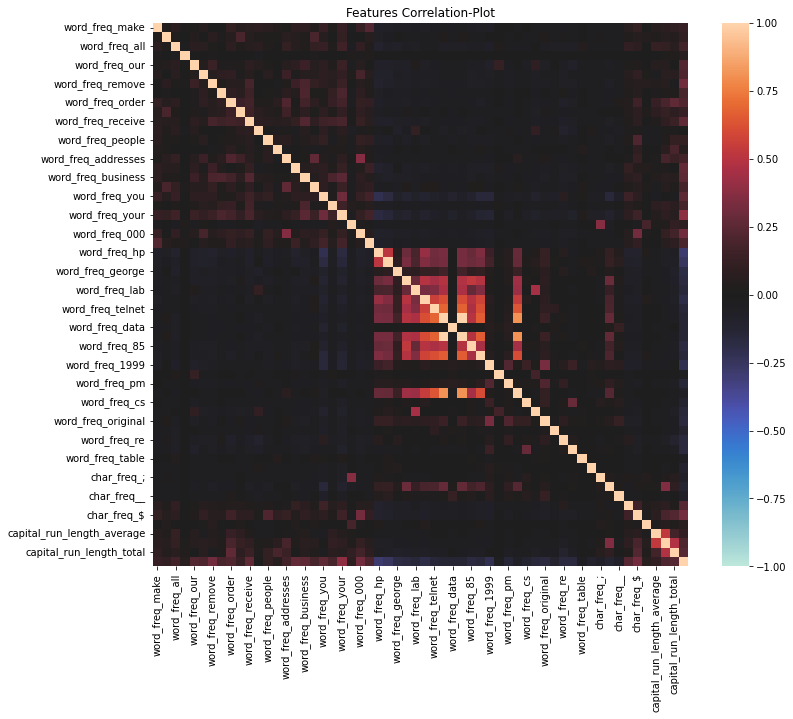

In [13]:
# Checking the correlation

features = model_data.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(model_data[features].corr(method='pearson'), vmin=-1, vmax=1, center=0) 
plt.show()

**Strategy:** \
We can fix these multicollinearity with two techniques:
1. Manual Method - Variance Inflation Factor (VIF)
2. Automatic Method - Recursive Feature Elimination (RFE)
3. Decomposition Method - Principle Component Analysis (PCA)

## 5a. Manual Method - VIF

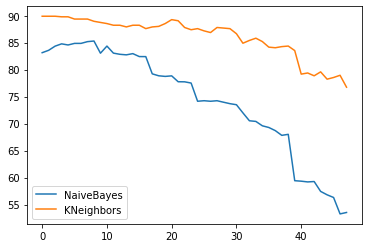

In [14]:
# Calculate the VIFs to remove multicollinearity
vif_selector = VIF()
vif_selector.fit(train_X_std, train_Y)

# Models to to test againts the VIF
bayes_ = NaiveBayes()
knn_ = KNeighbors(5)

feature_X_selected, scores = vif_selector.transform(bayes_, knn_, test_features=test_X_std, test_target=test_Y)

for model_name, score in scores.items():
    plt.plot(score, label=model_name)
plt.legend()
plt.show()

In [15]:
feature_X_selected.head()

,word_freq_3d
0,-0.050869
1,-0.050869
2,-0.050869
3,-0.050869
4,-0.050869


In [16]:
# Calculate the VIFs to remove multicollinearity
vif_selector = VIF(20)
vif_selector.fit(train_X_std, train_Y)

# Models to to test againts the VIF
bayes_ = NaiveBayes()
knn_ = KNeighbors(5)

feature_X_selected, scores = vif_selector.transform(bayes_, knn_, test_features=test_X_std, test_target=test_Y)

In [17]:
feature_X_selected.head()

,word_freq_3d,word_freq_over,word_freq_internet,word_freq_mail,word_freq_will,word_freq_people,word_freq_report,word_freq_email,word_freq_george,word_freq_parts,word_freq_pm,word_freq_cs,word_freq_project,word_freq_table,word_freq_conference,char_freq_;,char_freq__,char_freq_!,char_freq_hash,capital_run_length_average
0,-0.050869,-0.368721,-0.264207,-0.388547,0.832160,-0.322070,-0.191922,-0.363323,-0.195536,-0.059922,-0.195664,-0.12435,-0.123881,-0.075402,-0.116125,-0.160494,-0.159544,-0.351931,-0.095971,-0.046011
1,-0.050869,0.767967,-0.175139,0.256601,0.924426,2.494752,4.698958,0.036061,-0.195536,-0.059922,-0.195664,-0.12435,-0.092751,0.467481,-0.116125,-0.092801,-0.159544,0.381143,0.237445,-0.061042
2,-0.050869,-0.368721,0.871409,1.185920,-0.367289,4.647839,-0.191922,2.646577,-0.195536,-0.059922,-0.195664,-0.12435,-0.123881,-0.075402,-0.116125,-0.160494,-0.159544,0.207913,-0.095971,-0.096263
3,-0.050869,-0.368721,-0.264207,1.086076,0.832160,-0.322070,-0.191922,-0.363323,-0.195536,-0.059922,0.659644,-0.12435,1.883985,-0.075402,-0.116125,-0.160494,0.298161,-0.351931,-0.095971,-0.109827
4,-0.050869,-0.368721,-0.264207,0.302683,-0.655618,-0.322070,-0.191922,0.453598,-0.195536,-0.059922,-0.195664,-0.12435,-0.123881,-0.075402,-0.116125,0.076433,-0.159544,-0.287687,0.006618,-0.001738


# <center> 6. Predictive Modeling

---

## Naive Bayes Classfier:

In [45]:
# Building Naive Bayes Classifier
NB_model = NaiveBayes()

NB_model.fit(feature_X_selected.values, train_Y)
test_X_std = test_X_std[feature_X_selected.columns]
predictions = NB_model.predict(test_X_std.values)
confusion_matrix(test_Y, predictions)

array([[234, 260],
       [ 34, 432]], dtype=int64)

## K-Nearest Neighbours Classfier:

---

In [47]:
# Building K-Neareset Neighbours Classifier
KNN_model = KNeighbors()

KNN_model.fit(feature_X_selected.values, train_Y.values)
predictions = KNN_model.predict(test_X_std.values)

confusion_matrix(test_Y, predictions)

array([[412,  82],
       [ 84, 382]], dtype=int64)

---

# <center> 7. Project Outcomes & Conclusions

### Here are some of the key outcomes of the project:
- The Dataset was quiet small totalling around 4600 samples & after preprocessing 14.6% of the datasamples were dropped. 
- The samples were slightly imbalanced after processing, hence SMOTE Technique was applied on the data to  balance the classes, adding 16.7% more samples to the dataset.
- Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the feature-set.
- Feature Selection/Eliminination was carried out and appropriate features were shortlisted.
- Testing multiple algorithms with fine-tuning hyperparamters gave us some understanding on the model performance for various algorithms on this specific dataset.
- The Random Forest Classifier & XG-Boost performed exceptionally well on the current dataset, considering Precision Score as the key-metric.
- Yet it wise to also consider simpler model like Logistic Regression as it is more generalisable & is computationally less expensive, but comes at the cost of slight misclassifications.